2. What is the average height of the players? 


In [ ]:
import pandas as pd
from pathlib import Path

project_root = Path.cwd().parent
proc_dir = project_root / "data" / "processed"
out_dir = project_root / "reports" / "answers"
out_dir.mkdir(parents=True, exist_ok=True)

players = pd.read_parquet(proc_dir / "players_clean_heights.parquet")

mean_height = players["height"].mean()
mean_height_m = round(mean_height, 2)
mean_height_cm = round(mean_height * 100, 1)

print("Average player height (meters):", mean_height_m)
print("Average player height (cm):", mean_height_cm)

output_path = out_dir / "q2_avg_height.csv"
pd.DataFrame({
    "average_height_m": [mean_height_m],
    "average_height_cm": [mean_height_cm]
}).to_csv(output_path, index=False, encoding="utf-8-sig")

print(f"Saved to {output_path}")


Average player height (meters): 1.82
Average player height (cm): 182.2
Saved to c:\Users\mit\Desktop\Finaaal\reports\answers\q2_avg_height.csv


بخشی از ستون های خالی با میانگین قد با تفکیک جنسیت پر شد تا به نتایج جدید برسیم :

In [ ]:
import pandas as pd
from pathlib import Path

# مسیرهای پروژه
PROJECT_ROOT = Path.cwd().parent
DATA_RAW = PROJECT_ROOT / "data" / "raw"
DATA_PROCESSED = PROJECT_ROOT / "data" / "processed"
DATA_PROCESSED.mkdir(parents=True, exist_ok=True)

# 1) بارگذاری فایل players از RAW
players = pd.read_parquet(DATA_RAW / "players.parquet")

# 2) میانگین قد قبل از پر کردن مقادیر خالی
print("Mean height BEFORE filling")
print(players.groupby("gender")["height"].mean())
print("Overall:", players["height"].mean())
print()

gender_means = players.groupby("gender")["height"].mean()

players["height_by_gender"] = players["height"]

for g, m in gender_means.items():
    players.loc[
        (players["gender"] == g) & (players["height_by_gender"].isna()),
        "height_by_gender"
    ] = m

players.to_parquet(DATA_PROCESSED / "players_height_by_gender.parquet", index=False)
players.to_csv(DATA_PROCESSED / "players_height_by_gender.csv", index=False)

print("Mean height AFTER filling (height_by_gender)")
print(players.groupby("gender")["height_by_gender"].mean())
print("Overall:", players["height_by_gender"].mean())

# تفاوت میانگین کل بعد از پر کردن داده های نال نشون میده که
#  بیشتر داده های مربوط به زنان، ثبت نشده بود و با پر کردن اونها با میانگین قد از جنیست خودش
#  یک میانگین کل دقیقتر بدست میاریم که تعداد بالای زنان در اون تاثیر گذاشته
# پنج تا نال باقی موند که جنیست نداشتن و میشه با میانگین کشوری یا چیزای ترکیبی پرشون کرد


Mean height BEFORE filling
gender
F    1.731984
M    1.842860
Name: height, dtype: float64
Overall: 1.82169014084507

Mean height AFTER filling (height_by_gender)
gender
F    1.731984
M    1.842860
Name: height_by_gender, dtype: float64
Overall: 1.7909904885116341


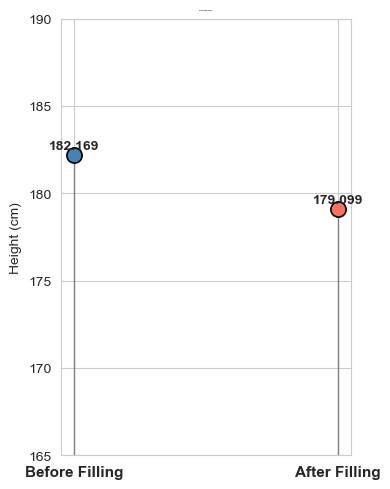

Chart saved to: c:\Users\mit\Desktop\Final_Project\reports\figures\overall_mean_before_after.png


In [44]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

project_root = Path.cwd().parent
figures_dir = project_root / "reports" / "figures"
figures_dir.mkdir(parents=True, exist_ok=True)

data = pd.DataFrame({
    "Stage": ["Before Filling", "After Filling"],
    "Mean Height": [182.169, 179.099]
})

color_map = {
    "Before Filling": "#4682B4",
    "After Filling": "#FF6F61"
}

y_min, y_max = 165, 190
plt.figure(figsize=(4, 5))

for i, (stage, height) in enumerate(zip(data["Stage"], data["Mean Height"])):
    plt.plot([i, i], [y_min, height], color='gray', linestyle='-', linewidth=1)
    plt.scatter(i, height, color=color_map[stage], s=120, zorder=3, edgecolor='black', linewidth=1.2)

plt.xticks(range(len(data)), data["Stage"], fontsize=11, fontweight='bold')
plt.ylabel("Height (cm)")
plt.ylim(y_min, y_max)
plt.title("Overall Mean Height", fontsize=1, fontweight="bold")

for i, val in enumerate(data["Mean Height"]):
    plt.text(i, val + 0.2, f"{val:.3f}", ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()

fig_path = figures_dir / "overall_mean_before_after.png"
plt.savefig(fig_path, dpi=300)
plt.show()
plt.close()

print(f"Chart saved to: {fig_path}")
